<h1 style="color:yellow; text-align:center; font-size:50px;">MovieMate</h1>
<h2 align="center" style="color:yellow;">--Movie Recommendation Engine--</h2>



<h3 style="color:cyan;"> Installation of required Python Libraries. </h3>
<i>This is only needed for first time initialization for a new system running it for the first time.</i>

In [1]:
!pip install pandas numpy scikit-learn matplotlib

<h4 style="color:cyan;">Code Block 1: Loading and Previewing the Dataset</h4>

In [2]:
import pandas as pd

# Load movies and ratings datac
movies_df = pd.read_csv('../data/u.item', sep='|', encoding='latin-1', header=None,
                        names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 
                               'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
                               'Sci-Fi', 'Thriller', 'War', 'Western'])


ratings_df = pd.read_csv('../data/u.data', sep='\t', encoding='latin-1', header=None,
                         names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Preview the data
display(movies_df.head(20))
display(ratings_df.head(20))

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


<h4 style="color:orange;"> Explanation: </h4>

The above block introduces the two main datasets:

<b>Movies Dataset:</b> Contains details about movies, including their titles, release dates, genres, and IMDb links.

<b>Ratings Dataset:</b> Records how users have rated movies, complete with timestamps.

Think of these datasets as two puzzle pieces. The movies_df gives you a list of movies, and the ratings_df provides insights into what people think about them. For example, if you want to know whether "Toy Story (1995)" was a fan favorite, this dataset combination can tell you.


The head(20) function shows the first 20 rows, letting us peek into the data. This is like flipping through the first few pages of a book to see if the story grabs your attention!

<h4 style="color:cyan;">Code Block 2: Inspecting the Structure of the DataFrames </h4>

In [3]:
# Basic Info about datasets
print("Movies DataFrame Info:")
print(movies_df.info())

print("Ratings DataFrame Info:")
print(ratings_df.info())

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-nul

<h4 style="color:orange;"> Explanation: </h4>

The above block examines the structure and metadata of both DataFrames. Key insights include:

Total number of rows and columns.
Data types of each column (e.g., integers, strings, floats).
Presence of missing values.
<b>Example Insights:</b>

The movies_df has 1,682 rows, with some missing release dates.
The ratings_df has 100,000 ratings from users.

Understanding your dataset's structure is essential for planning your data cleaning and analysis steps. It’s like knowing the tools in your toolbox before starting a DIY project.

<h4 style="color:cyan;">Code Block 3: Counting Missing Values </h4>

In [4]:
# Check for any missing values
print("\nMissing values in Movies Data:")
print(movies_df.isnull().sum())

print("\nMissing values in Ratings Data:")
print(ratings_df.isnull().sum())


Missing values in Movies Data:
movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

Missing values in Ratings Data:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


<h4 style="color:orange;"> Explanation: </h4>

Here, we use isnull().sum() to count the number of missing values in each column. This helps identify incomplete data that may need cleaning or imputation.

<b>For instance:</b>

The video_release_date column in movies_df is completely empty (1682 missing values), suggesting it’s irrelevant and could be dropped.
This is like finding broken links in a chain before using it.

In [5]:
# Display basic statistics of the ratings
print("\nRatings statistics:")
print(ratings_df.describe())


Ratings statistics:
            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


<h4 style="color:cyan;">Code Block 4: Cleaning the Movies Dataset </h4>

In [6]:
# Check if 'video_release_date' exists before dropping
if 'video_release_date' in movies_df.columns:
    movies_df.drop(columns=['video_release_date'], inplace=True)
else:
    print("'video_release_date' column does not exist or was already dropped.")
    
# Handle missing values in 'release_date' and 'IMDb_URL'
movies_df['release_date'] = movies_df['release_date'].fillna('Unknown')
movies_df['IMDb_URL'] = movies_df['IMDb_URL'].fillna('Unknown')

print("Missing values after cleaning:")
print(movies_df.isnull().sum())

Missing values after cleaning:
movie_id        0
movie_title     0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children        0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


<h4 style="color:orange;"> Explanation: </h4>

This block cleans the movies_df dataset by addressing missing or irrelevant data. Here's what happens step-by-step:

<b>Dropping the 'video_release_date' Column:</b>

The code checks if the video_release_date column exists before attempting to drop it. This avoids runtime errors if the column is missing.
This column has already been identified as irrelevant (completely empty), so it is removed.
Example Thought: Imagine a column in your data that's like a ghost town—completely empty and offering no insights. Dropping it makes your dataset cleaner and more manageable.

<b>Handling Missing Values:</b>

Missing values in the release_date and IMDb_URL columns are replaced with the string 'Unknown'.
This ensures there are no null entries, making the dataset consistent and preventing issues during further analysis.
Why is this important? For example, if a movie’s release date is missing, marking it as 'Unknown' helps you recognize it explicitly rather than dealing with cryptic NaN values.

<b>Checking for Remaining Missing Values:</b>

After cleaning, the code prints the count of missing values in each column to confirm that the data is ready for analysis.
This step is like tidying up your workspace before starting a project—it eliminates unnecessary distractions (empty columns) and ensures all tools (data fields) are in their place.

<h4 style="color:cyan;">Code Block 5: Visualizing Movie Release Years </h4>

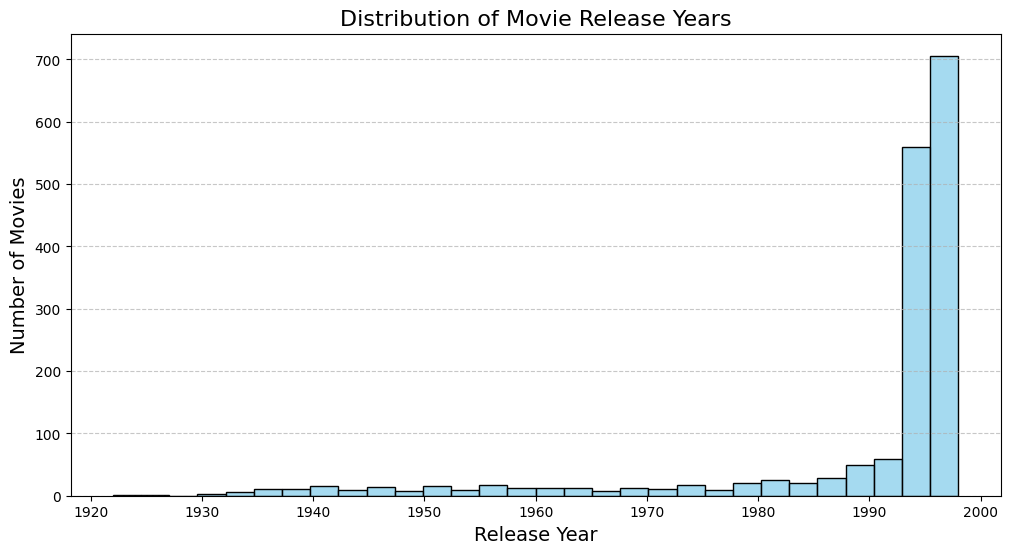

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'release_date' is treated as a string
movies_df['release_date'] = movies_df['release_date'].astype(str)

# Extract the release year from the 'release_date' column
movies_df['release_year'] = movies_df['release_date'].apply(
    lambda x: x.split('-')[-1] if x != 'Unknown' and '-' in x else 'Unknown'
)

# Remove entries with 'Unknown' year for the visualization and create a copy
movies_with_year = movies_df[movies_df['release_year'] != 'Unknown'].copy()

# Convert 'release_year' to numeric for sorting and visualization
movies_with_year['release_year'] = pd.to_numeric(movies_with_year['release_year'])

# Plot a histogram of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(data=movies_with_year, x='release_year', bins=30, kde=False, color="skyblue")

plt.title('Distribution of Movie Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="color:cyan;">Code Block 6: Visualizing Movie Genres </h4>

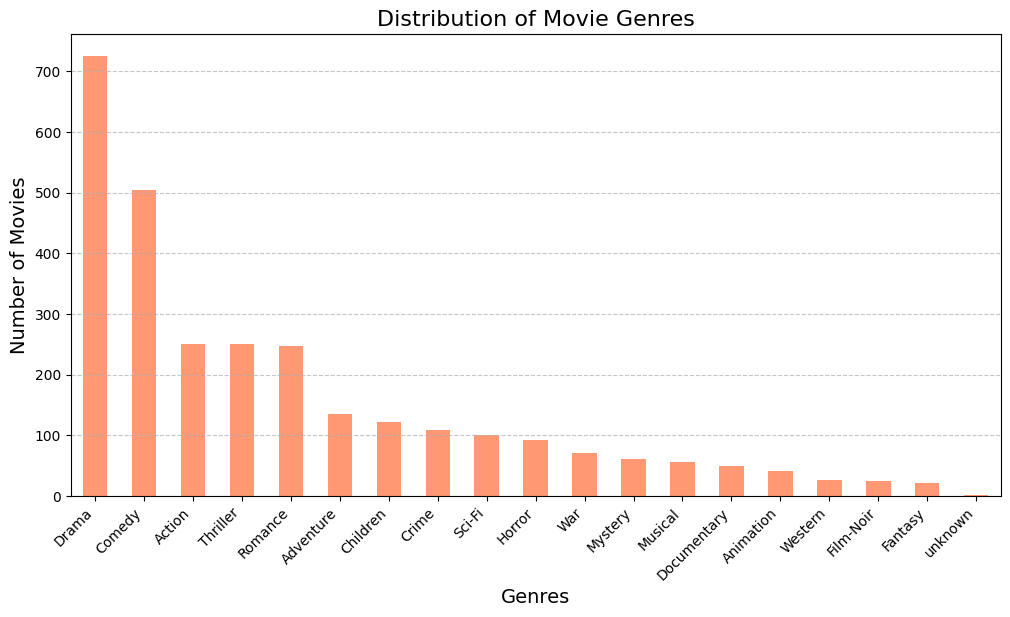

In [8]:
import matplotlib.pyplot as plt

# Identify genre columns dynamically by checking for binary columns (values 0 or 1)
genre_columns = movies_df.columns[movies_df.columns.str.contains(r'unknown|Action|Adventure|Animation|Children|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western')]

# Ensure genres are binary (0s and 1s) before summing
genre_counts = movies_df[genre_columns].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)

# Plot the genre distribution as a bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='coral', alpha=0.8)

plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="color:cyan;">Code Block 7: Visualizing Ratings Distribution </h4>

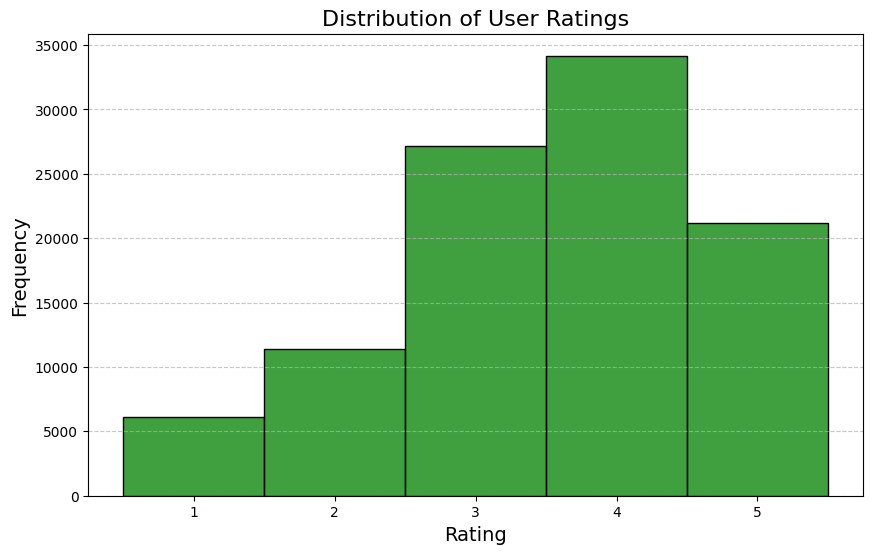

In [9]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_df, x='rating', bins=5, discrete=True, kde=False, color="green")

plt.title('Distribution of User Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="color:cyan;">Code Block 8: Saving the Cleaned Datasets </h4>

In [10]:
# Save the cleaned movies dataset
movies_df.to_csv('../cleaned_data/movies_cleaned.csv', index=False)

# Save the cleaned ratings dataset
ratings_df.to_csv('../cleaned_data/ratings_cleaned.csv', index=False)

print("Cleaned datasets saved successfully:")
print("movies_cleaned.csv and ratings_cleaned.csv are stored in the 'cleaned_data/' folder.")

Cleaned datasets saved successfully:
movies_cleaned.csv and ratings_cleaned.csv are stored in the 'cleaned_data/' folder.
